# `Explaining Logistic Regression`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# Purpose & Outcome:

+ Cover the theory of Logistic Regression and get a feel of the underworkings
+ Some plotting and examples to help 

# `Let me know if there are any videos you would like to see.`


# <font color=red>Check me out on Buy Me A Coffee:</font> `@mrfugudatasci`

`--------------------------------`

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt 

+ `Logistic (Logit) regression` is used for `Classification`. We showed an example of this in the previous notebook (*`skLearn_01`*) where we looked for Ham/Spam for sms messages. 

+ You are trying to estimate the probability that some instance, belongs to a particular class. 
    + Using logistic regression, you are preserving the marginal probabilities of training data.
    + You are also using the coefficients to aide in detecting what input variables are important. 

`--------------------------------------`

**But, why not use `Linear Regression`?**

+ In order to use `Linear Regression` we would have to create a threshold for the classification. 
    + This is a problem if we are only trying to do a (Pass/Fail).
    + Unbounded results; unlike when using logistic which are [0:1]
        + Hmm, what does that mean?
            * Well: Linear regression will have an instance where the values are > 1 or <0. 
    + Outliers, are a problem because they will change the best fit line and increase error.


# `Differences:`

+ `Linear Regression:`
    * Fits a line, to the points (data) which can be used to estimate/predicate a new value
    

+ `Logistic Regression:`
    * fits a line to best separate between classes

`--------------------------------------`


# `What are we trying to find?`

+ The parameters "coefficients" <font size=5>$\beta$</font> are estimated using one of two methods:

    * `Least Squares Optimization:` using iterative approach [IRWLS](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares) 
    * `Max Likelihood Estimation` 
    

    
# `What Are We Exactly Calculating with Logistic Regression?`

+ `You are computing a weighted sum of input features, plus a bias 'intercept' term`
    + There is one coefficient per input.
    
`Starting from Linear Regression`: we have our hypothesis <font size=4>f ($x_i$)</font> representing the predicted response for the <font size=4>$i^{th}$</font> oberservation of <font size=4>$x_i$</font>.

<font size=5>$P(X) =f(x_i) = \hat{Y} = \beta_0 + \beta_1x_{i1}+ \beta_2x_{i2}+...+\beta_m x_{im}$</font>

At this point the output would be a (real) value, not a class label. At this point we need to do some work and make this output what we want [0,1]

`-----------------------------`

# Here comes the `Logistic Function` (*sigmoid*)

`Logistic Function:` <font size=5>$f(x) = \frac{1}{(1 + e^{-x})}$</font>

For input <font size=4>( x )</font> we will replace with the weighted sum


<font size=5>$f(x) = \frac{1}{(1 + e^{- (\beta_o +\beta x)})}$</font>

`------------------------------`


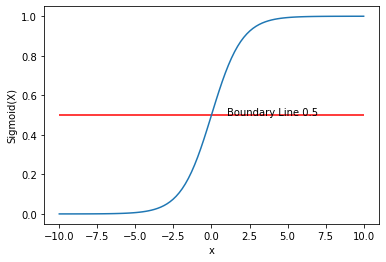

In [27]:
# Plot sigmoid
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
plt.hlines(y=.5, xmin=-10, xmax=10, colors='red', linestyles='solid')
plt.text(1,0.5,'Boundary Line 0.5')
plt.show() 


# Now, we have to get the `Log-Odds:`

+ Think of when you did an introduction to probability and were introduced to gambling: (wins:loses) ratio.

We can convert that to a probability of success: <font size=5>$\frac{P}{1-P}$</font>

`And to get the log-odds for success:` <font size=5>$log(\frac{P}{1-P})$</font>

Now we will plug this into our logistic function from above:

<font size=5>$log(\frac{P}{1-P}) = \beta_o +\beta X$</font>

<font size=5>$\frac{P}{1-P} = e^{\beta_o +\beta X}$</font>

`-------------------------------`


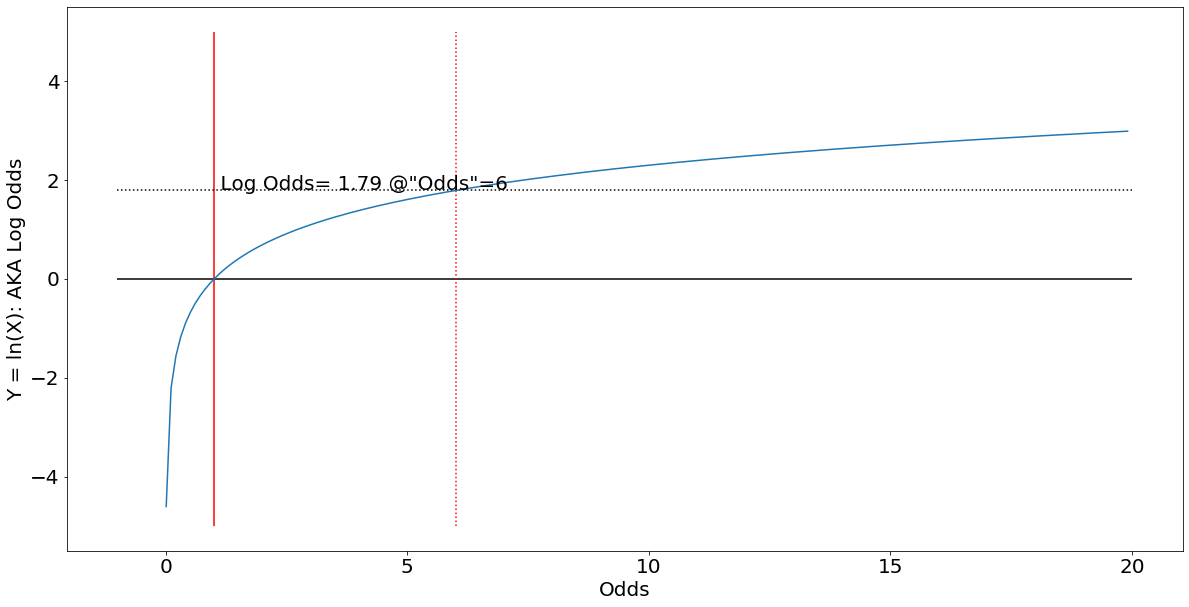

In [123]:
# Log Odds:


x = np.arange(0.01,20,0.1)
y = np.log(x)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.vlines(x=1,ymin=-5,ymax=5, colors='red', linestyles='solid')
plt.hlines(y=0,xmin=-1,xmax=20, colors='black', linestyles='solid')
plt.xlabel("Odds",size=20) 
plt.ylabel("Y = ln(X): AKA Log Odds",size=20) 

plt.vlines(x=6,ymin=-5,ymax=5, colors='red', linestyles='dotted')
plt.hlines(y=np.log(6),xmin=-1,xmax=20, colors='black', linestyles='dotted')
plt.text(1,np.log(6),' Log Odds= 1.79 @"Odds"=6',size=20)
plt.plot(x,y)
plt.show()



# `Let's Have fun and do some interpreting:`

In [124]:
log_odds_=np.log(6)
print('Log-Odds ln(x); when Odds = 6: returns %.2f' % log_odds_)
print('--------------------')
print('')
print('--------------------')
prob_=1 / (1 + np.exp(-np.log(6)))
print('Probability when you convert Log-Odds value: %.2f' % prob_ )
print('--------------------')
print('')
odds_ = 0.7/.3
print("If Prob. = 0.7, let's find the Odds-ratio (P/(1-P)) = (%.2f : 1)" % odds_)
print('you will have a 2.33 to 1 chance')

Log-Odds ln(x); when Odds = 6: returns 1.79
--------------------

--------------------
Probability when you convert Log-Odds value: 0.86
--------------------

If Prob. = 0.7, let's find the Odds-ratio (P/(1-P)) = (2.33 : 1)
you will have a 2.33 to 1 chance


# In `Logistic Regression` the dependent variable is the Logit:

<font size=5>$Log(Odds) = logit(P) = ln(\frac{P}{1-P})$</font>

Therefore the odds is a function of probability of getting a 1.

`-------------------------------`

# `How about we use an example to clarify`

`Ex.) Among men 40 years old, the odds of acting weird before the age of 50 are 2X's greater for never married men.`

<font size=5>$\frac{'oddsOfBeingWeird Given Never Married '}{odds Of Weird Being Married} =2$</font>


<font size=5>$\frac{'oddsOfBeingWeird Given Never Married '}{odds Of Weird Being Married} = \frac{e^{\beta_0}e^{\beta_1}}{e^{\beta_0}} = e^{\beta_1}$</font>

| **`Group`**         	|   X	| `Odds Weird`               	|
|---------------	|---	|--------------------------	|
| Never Married 	| 1 	| <font size=4>$e^{\beta_0}e^{\beta_1}$</font> 	|
| Married       	| 0 	| <font size=4>$e^{\beta_0}$</font>            	|


# `Therefore, when we increase` <font size=5>$x_k$</font> `by 1 unit then the odds variable` <font size=5>$e^{\beta_k}$</font> `is multiplied by Y=1. with all other independent variables held constant.`

`----------------------------------------`

# `Before we go further let's get some insight:`

if we take the right hand side of the equation and set to <font size=5>$\sum\limits^{K}_{j=0}e^{b_jx_j}$</font> noticing that we have <font size=5>$\prod\limits^{K}_{j=0}e^{b_jx_j} $</font>

+ **Notice** that you have a `multiplicative effect instead of additive like linear regression`

**Ex.)** 
Now, let's give $b_j=0.789$, and set $x_j=1$ then we end up with 2.201
Therefore, we would end up with each value odds for our response ($e^{b_j}$) being True will (Increase/Decrease) as $x_j$ increase 1 unit.

Here, we noticed a doubling effect.

`If you were using` $x_j$ `as some value such as months, or years then for each time interval of (x) you will double the odds of the response being true.` (All other things being held constant!)

`ex.) if the categories were: Rich/Poor and encoded (Rich=1,Poor=0) then we would have if the response was Rich; twice as likely or being true (all other things being constant)`

`---------------------------------`

<font size=5>$\frac{P}{1-P} = e^{\beta_o +\beta X}$</font>

<font size=5>$P = e^{\beta_o +\beta X}(1-P)$</font>

<font size=5>$P = e^{\beta_o +\beta X}-P(e^{\beta_o +\beta X}))$</font>

<font size=5>$P + P(e^{\beta_o +\beta X})= e^{\beta_o +\beta X}$</font>

<font size=5>$P + (1 + e^{\beta_o +\beta X})=e^{\beta_o +\beta X}$</font>

<font size=5>$P = \frac{e^{\beta_o +\beta X}}{(1 + e^{\beta_o +\beta X})}$</font>

<font size=5>$P = \frac{e^{\beta_o +\beta X}}{\frac{e^{\beta_o +\beta X}}{e^{\beta_o +\beta X}}+ e^{\beta_o +\beta X}}$</font>

<font size=5>$P = \frac{e^{\beta_o +\beta X}}{e^{\beta_o +\beta X}[{\frac{1}{e^{\beta_o +\beta X}}+1}]}$</font>

<font size=5>$P(X) = \frac{1}{(1 + e^{- (\beta_o +\beta X)})}$</font>

**Note:** if the log-odds are linearly related to X, then the relation between X and P are nonlinear. Then you will have the S-curve we had above.

+ The **decision boundary:**
    * $\beta_o +\beta x=0$ will be your solution to the separating line for the predicted classes.
    * Distance between the decision line is: <font size=5>$\frac{\beta_o}{||\beta||}+x\frac{\beta}{||\beta||}$</font>
    
    
**`Logistic Regression WILL tell you where the boundary is between classes as well as the dependence of class probability boundaries`**

[ex. and help](http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html)

`----------------------------------`

`--------------`

+ **`Decission Boundary Consideration:`** Ideally, you aim for `Recall & Precision = 1`
    * `Low Recall: High Precision:` situation where you may want to `reduce number of false positives without adjusting false negaitives` you will choose a value with either a `High Recall or Low Precision`.
        + This can occur in situations where you have adevertising and you want to make a clear, positive impression.  
    * `Low Precision: High Recall:` opposite of above.
        + Think of falsly labeling someone with cancer as not having cancer.

# `Log Likelihood:`

+ Since, `logistic regression` predicts probabilities and not just classes; we can use the likelihood.

Before we get started we will need the `Bernoulli Trials` <font size=5>$p(x_i)^{y_i}(1-p(x_i))^{1-y_i}$</font>

where:
* <font size=4>$x_i =$ vector of features</font>
* <font size=4>$y_i =$ class labels</font>

<font size=5>$Y_i =\{^{p=1}_{1-p=0}$</font>

`Likelihood, with Bernoulli trials:`
<font size=5>$L(\beta_o,\beta) = \prod\limits_{i=1}^n P(x_i)^{y_i}(P(x_i)^{1-y_i})$</font>

`--------------------------------`

`Log-Likelihood:` <font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i log(P(x_i)) + \sum\limits_{i=1}^{n} (y_i-1)log(1-P(x_i))$</font>


<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i log(P(x_i))+\sum\limits_{i=1}^{n} log(P(1-x_i))- y_ilog(P(1-x_i))$</font>

`--------------------`

`Manpiulate logs:`

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i log(\frac{P(x_i)}{1-P(x_i)})+log(1-P(x_i)))$</font>

`--------------------`

`Substitute:` <font size=5>$log(\frac{P(x_i)}{1-P(x_i)}) = \beta_o+x\beta$</font>

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i (\beta_o+x\beta)+log(1-P(x_i)))$</font>

`--------------------`

`Substitute:` $P(x_i)$, also pay attention to the signs!

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i (\beta_o+x\beta)-log(1+e^{\beta_o+x\beta}))$</font>

[Bernoulli/Binomial Review](http://galton.uchicago.edu/~eichler/stat22000/Handouts/l12.pdf)

# <font color=red>LIKE</font>, Share & 

# <font color=red>SUB</font>scribe

# Citations & Help

# ◔̯◔

https://medium.com/@lily_su

https://medium.com/@lily_su/log-linear-regression-85ed7f1a8f24

https://realpython.com/logistic-regression-python/ (very good code examples)

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

https://www.kdnuggets.com/2019/05/modeling-price-regularized-linear-model-xgboost.html

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/blob/master/Logistic_Regression.ipynb

https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/ (good overall concept explanation)

http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11LogisticRegression.pdf

`Math`

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/40%20LogisticRegression.pdf

https://win-vector.com/2011/09/14/the-simpler-derivation-of-logistic-regression/

https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf

http://personal.psu.edu/jol2/course/stat597e/notes2/logit.pdf

https://www.kaggle.com/hamzafar/derivation-in-context-of-logistic-regression

http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11LogisticRegression.pdf